In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.0 MB/s 


In [ ]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
las = lasio.read('/content/drive/MyDrive/Colab Notebooks/Intern/GAUNTWRIGHTUNITNO-09H1.las')
las

In [ ]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [ ]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr=""),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="")]

In [ ]:
for item in las.sections['Well']:
    print(item)

HeaderItem(mnemonic="STRT", unit="FT", value="295.0", descr="")
HeaderItem(mnemonic="STOP", unit="FT", value="3561.0", descr="")
HeaderItem(mnemonic="STEP", unit="FT", value="0.5", descr="")
HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="")
HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY")
HeaderItem(mnemonic="WELL", unit="", value="GAUNT-WRIGHT UNIT NO. 1-32", descr")
HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD")
HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION")
HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY")
HeaderItem(mnemonic="DATE", unit="", value="2020-07-30 04:07:39   : Log Export")
HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE")
HeaderItem(mnemonic="UWI", unit="", value="", descr="UNIQUE WELL ID")
HeaderItem(mnemonic="API", unit="", value="", descr="API NUMBER")


In [ ]:
for curve in las.sections['Curves']:
    print(curve.mnemonic)

DEPT:1
DEPT:2
AVTX
BVTX
CILD
CNDL
CNLS
CNPOR
CNSS
DCAL
DPOR
GR
LSPD
LTEN
RHOB
RHOC
RILD
RILM
RLL3
RXORT
SP
MCAL
MI
MN
SSTVD


In [ ]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT:1, 	 Units: FT, 	 Description: DEPTH
Curve: DEPT:2, 	 Units: FT, 	 Description: DEPT
Curve: AVTX, 	 Units: _, 	 Description: AVTX
Curve: BVTX, 	 Units: _, 	 Description: BVTX
Curve: CILD, 	 Units: mS/m, 	 Description: CILD
Curve: CNDL, 	 Units: _, 	 Description: CNDL
Curve: CNLS, 	 Units: _, 	 Description: CNLS
Curve: CNPOR, 	 Units: _, 	 Description: CNPOR
Curve: CNSS, 	 Units: _, 	 Description: CNSS
Curve: DCAL, 	 Units: in, 	 Description: DCAL
Curve: DPOR, 	 Units: m3/m3, 	 Description: DPOR
Curve: GR, 	 Units: gAPI, 	 Description: GR
Curve: LSPD, 	 Units: _, 	 Description: LSPD
Curve: LTEN, 	 Units: _, 	 Description: LTEN
Curve: RHOB, 	 Units: g/cm3, 	 Description: RHOB
Curve: RHOC, 	 Units: g/cm3, 	 Description: RHOC
Curve: RILD, 	 Units: _, 	 Description: RILD
Curve: RILM, 	 Units: _, 	 Description: RILM
Curve: RLL3, 	 Units: _, 	 Description: RLL3
Curve: RXORT, 	 Units: _, 	 Description: RxoRt
Curve: SP, 	 Units: mV, 	 Description: SP
Curve: MCAL, 	 Units: in, 	 Desc

In [ ]:
well = las.df()
well.head()

,DEPT:2,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,DPOR,...,RHOC,RILD,RILM,RLL3,RXORT,SP,MCAL,MI,MN,SSTVD
DEPT:1,,,,,,,,,,,,,,,,,,,,,
295.0,295.0,0.0,0.0,51.313900,24.822500,32.430199,0.324302,35.021198,1.8666,65.502701,...,0.0506,19.487900,100000.0,0.7437,125.144600,174.195908,3.9760,0.9735,0.4701,1611.0
295.5,295.5,0.0,0.0,52.767502,26.816200,34.017101,0.340171,36.606400,1.8670,65.597198,...,0.0493,18.951099,100000.0,0.7413,124.160301,174.130203,3.9739,0.9754,0.4725,1610.5
296.0,296.0,0.0,0.0,54.166599,29.334801,35.894798,0.358948,38.231998,1.8673,65.782303,...,0.0474,18.461599,100000.0,0.7387,123.237503,174.042694,3.9775,0.9776,0.4759,1610.0
296.5,296.5,0.0,0.0,55.442101,31.393000,37.322399,0.373224,39.268101,1.8666,66.131798,...,0.0448,18.036800,100000.0,0.7371,122.408096,173.959198,3.9779,0.9799,0.4824,1609.5
297.0,297.0,0.0,0.0,56.611099,32.237301,38.028000,0.380280,39.738998,1.8670,66.592598,...,0.0420,17.664400,100000.0,0.7364,121.650002,173.891205,3.9745,0.9817,0.4899,1609.0


In [ ]:
well = well.reset_index(drop=False)
well.head()

,DEPT:1,DEPT:2,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,...,RHOC,RILD,RILM,RLL3,RXORT,SP,MCAL,MI,MN,SSTVD
0,295.0,295.0,0.0,0.0,51.313900,24.822500,32.430199,0.324302,35.021198,1.8666,...,0.0506,19.487900,100000.0,0.7437,125.144600,174.195908,3.9760,0.9735,0.4701,1611.0
1,295.5,295.5,0.0,0.0,52.767502,26.816200,34.017101,0.340171,36.606400,1.8670,...,0.0493,18.951099,100000.0,0.7413,124.160301,174.130203,3.9739,0.9754,0.4725,1610.5
2,296.0,296.0,0.0,0.0,54.166599,29.334801,35.894798,0.358948,38.231998,1.8673,...,0.0474,18.461599,100000.0,0.7387,123.237503,174.042694,3.9775,0.9776,0.4759,1610.0
3,296.5,296.5,0.0,0.0,55.442101,31.393000,37.322399,0.373224,39.268101,1.8666,...,0.0448,18.036800,100000.0,0.7371,122.408096,173.959198,3.9779,0.9799,0.4824,1609.5
4,297.0,297.0,0.0,0.0,56.611099,32.237301,38.028000,0.380280,39.738998,1.8670,...,0.0420,17.664400,100000.0,0.7364,121.650002,173.891205,3.9745,0.9817,0.4899,1609.0


In [ ]:
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPT:1  6533 non-null   float64
 1   DEPT:2  6533 non-null   float64
 2   AVTX    6533 non-null   float64
 3   BVTX    6533 non-null   float64
 4   CILD    6533 non-null   float64
 5   CNDL    6458 non-null   float64
 6   CNLS    6525 non-null   float64
 7   CNPOR   6458 non-null   float64
 8   CNSS    6458 non-null   float64
 9   DCAL    6486 non-null   float64
 10  DPOR    6490 non-null   float64
 11  GR      6520 non-null   float64
 12  LSPD    6533 non-null   float64
 13  LTEN    6533 non-null   float64
 14  RHOB    6490 non-null   float64
 15  RHOC    6490 non-null   float64
 16  RILD    6533 non-null   float64
 17  RILM    6533 non-null   float64
 18  RLL3    6511 non-null   float64
 19  RXORT   6533 non-null   float64
 20  SP      6533 non-null   float64
 21  MCAL    6503 non-null   float64
 22  

In [ ]:
percent_missing = well.isnull().sum() * 100 / len(well)
missing_value_df = pd.DataFrame({'column_name': well.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
DEPT:1,DEPT:1,0.000000
DEPT:2,DEPT:2,0.000000
AVTX,AVTX,0.000000
BVTX,BVTX,0.000000
CILD,CILD,0.000000
CNDL,CNDL,1.148018
CNLS,CNLS,0.122455
CNPOR,CNPOR,1.148018
CNSS,CNSS,1.148018
DCAL,DCAL,0.719424


In [ ]:
well = well.apply(lambda x: x.fillna(x.mean()),axis=0)
well.isna().sum()

DEPT:1    0
DEPT:2    0
AVTX      0
BVTX      0
CILD      0
CNDL      0
CNLS      0
CNPOR     0
CNSS      0
DCAL      0
DPOR      0
GR        0
LSPD      0
LTEN      0
RHOB      0
RHOC      0
RILD      0
RILM      0
RLL3      0
RXORT     0
SP        0
MCAL      0
MI        0
MN        0
SSTVD     0
dtype: int64

In [ ]:
percent_missing = well.isnull().sum() * 100 / len(well)
missing_value_df = pd.DataFrame({'column_name': well.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
DEPT:1,DEPT:1,0.0
DEPT:2,DEPT:2,0.0
AVTX,AVTX,0.0
BVTX,BVTX,0.0
CILD,CILD,0.0
CNDL,CNDL,0.0
CNLS,CNLS,0.0
CNPOR,CNPOR,0.0
CNSS,CNSS,0.0
DCAL,DCAL,0.0


In [ ]:
well.describe()

,DEPT:1,DEPT:2,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,DCAL,...,RHOC,RILD,RILM,RLL3,RXORT,SP,MCAL,MI,MN,SSTVD
count,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,...,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000
mean,1928.000000,1928.000000,0.002755,0.008725,311.281071,17.532474,24.862718,0.249213,27.849269,3.555370,...,0.041618,1495.420053,1184.317871,9.184196,-7.874092,-51.462365,5.043554,9.533334,10.873585,-22.000000
std,943.029493,943.029493,0.055265,0.100901,234.467087,9.931883,10.364968,0.102867,9.573813,2.975559,...,0.110259,12094.145602,10792.520666,12.806768,48.799672,41.126659,3.374116,18.047796,21.080201,943.029493
min,295.000000,295.000000,0.000000,0.000000,0.000000,0.014400,0.288200,0.003730,4.372200,-48.799999,...,-3.142000,0.622200,0.591800,0.010000,-93.759201,-141.413101,-131.337601,0.000200,0.000300,-1655.000000
25%,1111.500000,1111.500000,0.000000,0.000000,130.704407,8.214800,16.729200,0.168879,20.632799,1.868500,...,-0.027800,2.360700,2.054400,3.160900,-23.408001,-76.022697,3.980500,1.174900,1.670000,-838.500000
50%,1928.000000,1928.000000,0.000000,0.000000,281.415894,19.380301,28.271299,0.282336,30.778799,1.956000,...,0.013500,3.553500,2.871600,5.158000,-14.461000,-58.646900,3.990700,1.254900,2.055600,-22.000000
75%,2744.500000,2744.500000,0.000000,0.000000,423.603790,25.428600,32.761600,0.327663,35.366901,7.684600,...,0.073700,7.650900,5.308200,9.294100,-5.543700,-16.319300,7.731900,6.736700,7.164900,794.500000
max,3561.000000,3561.000000,2.000000,2.000000,1607.140869,46.455399,47.216900,0.472169,46.050400,9.587900,...,0.337400,100000.000000,100000.000000,157.654907,367.615112,174.195908,10.266800,134.740707,189.864899,1611.000000


In [ ]:
well.shape

(6533, 25)

In [ ]:
Depth = list(well['DEPT:1'])
Depth

[295.0,
 295.5,
 296.0,
 296.5,
 297.0,
 297.5,
 298.0,
 298.5,
 299.0,
 299.5,
 300.0,
 300.5,
 301.0,
 301.5,
 302.0,
 302.5,
 303.0,
 303.5,
 304.0,
 304.5,
 305.0,
 305.5,
 306.0,
 306.5,
 307.0,
 307.5,
 308.0,
 308.5,
 309.0,
 309.5,
 310.0,
 310.5,
 311.0,
 311.5,
 312.0,
 312.5,
 313.0,
 313.5,
 314.0,
 314.5,
 315.0,
 315.5,
 316.0,
 316.5,
 317.0,
 317.5,
 318.0,
 318.5,
 319.0,
 319.5,
 320.0,
 320.5,
 321.0,
 321.5,
 322.0,
 322.5,
 323.0,
 323.5,
 324.0,
 324.5,
 325.0,
 325.5,
 326.0,
 326.5,
 327.0,
 327.5,
 328.0,
 328.5,
 329.0,
 329.5,
 330.0,
 330.5,
 331.0,
 331.5,
 332.0,
 332.5,
 333.0,
 333.5,
 334.0,
 334.5,
 335.0,
 335.5,
 336.0,
 336.5,
 337.0,
 337.5,
 338.0,
 338.5,
 339.0,
 339.5,
 340.0,
 340.5,
 341.0,
 341.5,
 342.0,
 342.5,
 343.0,
 343.5,
 344.0,
 344.5,
 345.0,
 345.5,
 346.0,
 346.5,
 347.0,
 347.5,
 348.0,
 348.5,
 349.0,
 349.5,
 350.0,
 350.5,
 351.0,
 351.5,
 352.0,
 352.5,
 353.0,
 353.5,
 354.0,
 354.5,
 355.0,
 355.5,
 356.0,
 356.5,
 357.0,


In [ ]:
new_well = well.filter(['GR', 'RHOB'])
new_well

,GR,RHOB
0,48.464100,1.58990
1,46.941101,1.58830
2,46.959801,1.58510
3,47.462002,1.57910
4,47.488800,1.57130
...,...,...
6528,68.627850,1.82121
6529,68.627850,1.82121
6530,68.627850,1.82121
6531,68.627850,1.82121


In [ ]:
new_well.shape

(6533, 2)

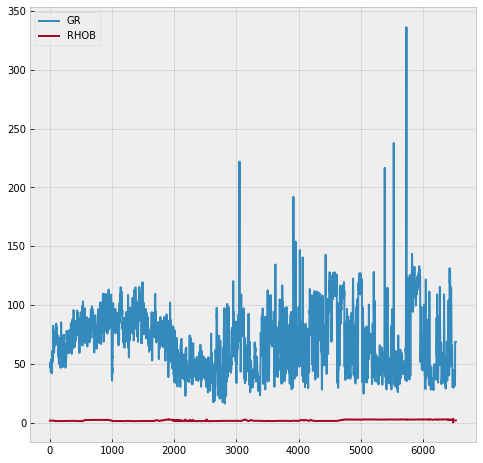

In [ ]:
new_well.plot()

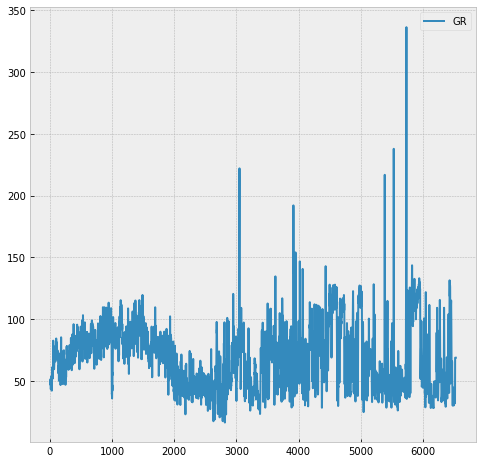

In [ ]:
new_well.plot(y='GR')

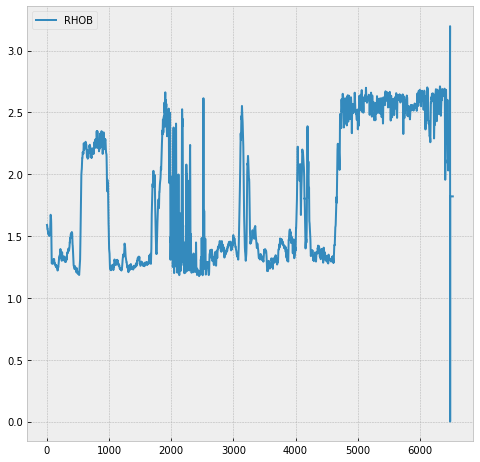

In [ ]:
new_well.plot(y='RHOB')

In [ ]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
well = scaler.fit_transform(new_well)
well

array([[-7.72365304e-01, -4.22112557e-01],
       [-8.30703235e-01, -4.25032411e-01],
       [-8.29986952e-01, -4.30871901e-01],
       ...,
       [ 6.53210114e-15, -6.07806432e-15],
       [ 6.53210114e-15, -6.07806432e-15],
       [ 6.53210114e-15, -6.07806432e-15]])

In [ ]:
well = pd.DataFrame(well, columns = ['GR','RHOB'])
well

,GR,RHOB
0,-7.723653e-01,-4.221126e-01
1,-8.307032e-01,-4.250324e-01
2,-8.299870e-01,-4.308719e-01
3,-8.107503e-01,-4.418212e-01
4,-8.097238e-01,-4.560553e-01
...,...,...
6528,6.532101e-15,-6.078064e-15
6529,6.532101e-15,-6.078064e-15
6530,6.532101e-15,-6.078064e-15
6531,6.532101e-15,-6.078064e-15


In [ ]:
well.describe()

,GR,RHOB
count,6.533000e+03,6.533000e+03
mean,-1.383850e-16,-1.296684e-15
std,1.000077e+00,1.000077e+00
min,-2.011704e+00,-3.323486e+00
25%,-8.178138e-01,-9.099024e-01
50%,-3.811893e-02,-5.591610e-01
75%,6.306191e-01,1.150202e+00
max,1.025493e+01,2.512656e+00


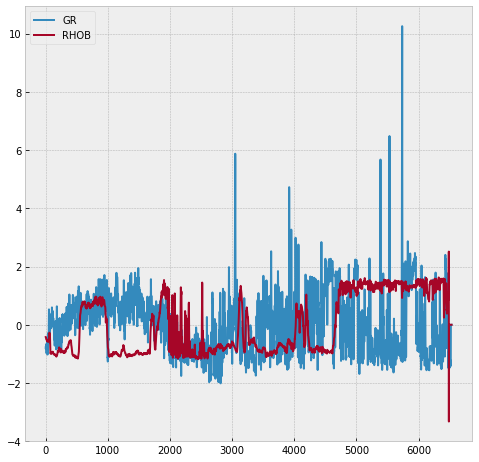

In [ ]:
well.plot()

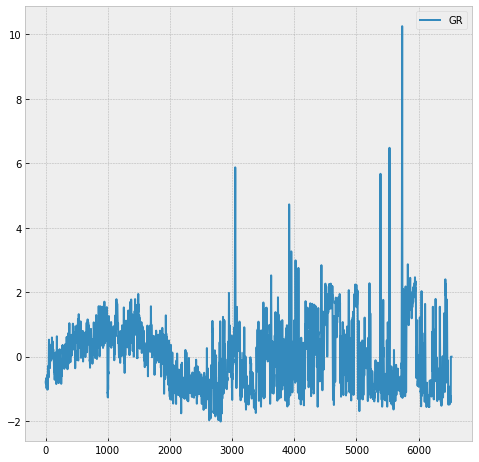

In [ ]:
well.plot(y='GR')

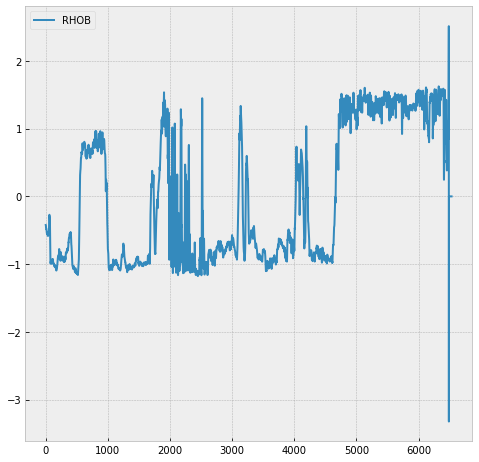

In [ ]:
well.plot(y='RHOB')

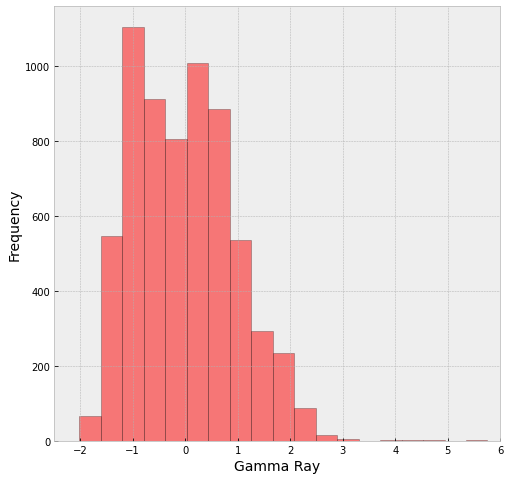

In [ ]:
plt.hist(well['GR'], bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-2.5,6)

plt.show()

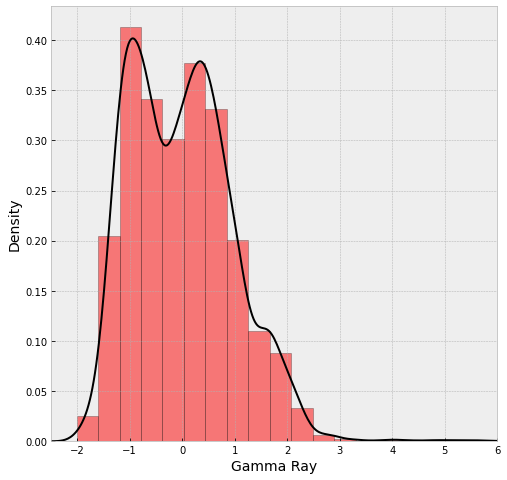

In [ ]:
# In addition to the bars, we can also add in a kernel density estimation, which provides us with a line illustrating
# the distribution of the data.

well['GR'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
well['GR'].plot(kind='kde', color='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(-2.5,6)

plt.show()

In [ ]:
mean = well['GR'].mean()
p5 = well['GR'].quantile(0.05)
p95 = well['GR'].quantile(0.95)
p25 = well['GR'].quantile(0.25)
Median = well['GR'].quantile(0.50)
p75 = well['GR'].quantile(0.75)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')
print(f'P95: \t {p25}')
print(f'P95: \t {Median}')
print(f'P95: \t {p75}')

Mean: 	 -1.3838502304663313e-16
P05: 	 -1.332966858206583
P95: 	 1.73021585029955
P95: 	 -0.8178137881549467
P95: 	 -0.03811893417392956
P95: 	 0.6306190741211026


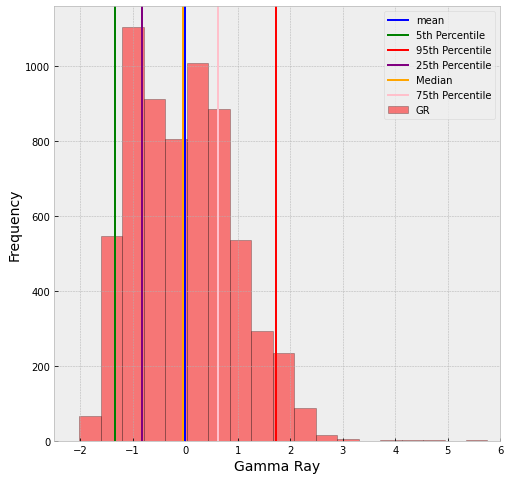

In [ ]:
# To get an idea of where these points fall in relation to our data, we can add them onto the plot 
# using axvline and passing in the calculated variables, a colour and a label

well['GR'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-2.5,6)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='red', label='95th Percentile')
plt.axvline(p25, color='purple', label='25th Percentile')
plt.axvline(Median, color='orange', label='Median')
plt.axvline(p75, color='pink', label='75th Percentile')

plt.legend()
plt.show()

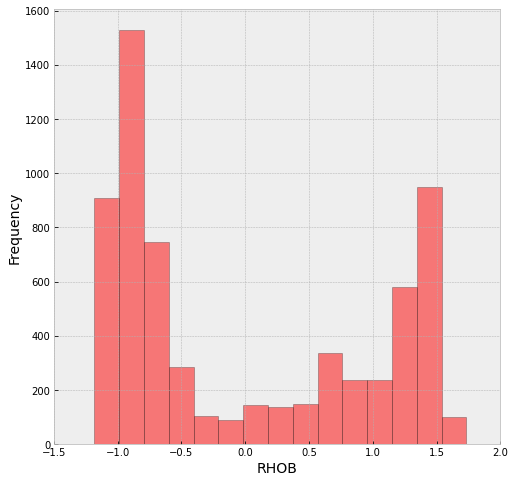

In [ ]:
plt.hist(well['RHOB'], bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('RHOB', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-1.5,2)

plt.show()

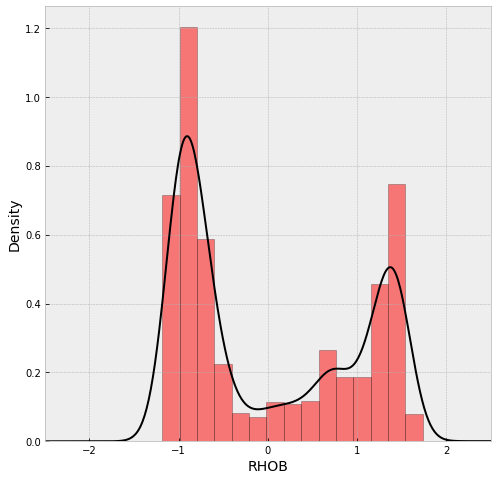

In [ ]:
# In addition to the bars, we can also add in a kernel density estimation, which provides us with a line illustrating
# the distribution of the data.

well['RHOB'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
well['RHOB'].plot(kind='kde', color='black')
plt.xlabel('RHOB', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(-2.5,2.5)

plt.show()

In [ ]:
mean = well['RHOB'].mean()
p5 = well['RHOB'].quantile(0.05)
p95 = well['RHOB'].quantile(0.95)
p25 = well['RHOB'].quantile(0.25)
Median = well['RHOB'].quantile(0.50)
p75 = well['RHOB'].quantile(0.75)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')
print(f'P95: \t {p25}')
print(f'P95: \t {Median}')
print(f'P95: \t {p75}')

Mean: 	 -1.2966836044784783e-15
P05: 	 -1.067900384447499
P95: 	 1.479118178131131
P95: 	 -0.9099024315837775
P95: 	 -0.5591610028691014
P95: 	 1.1502020817992238


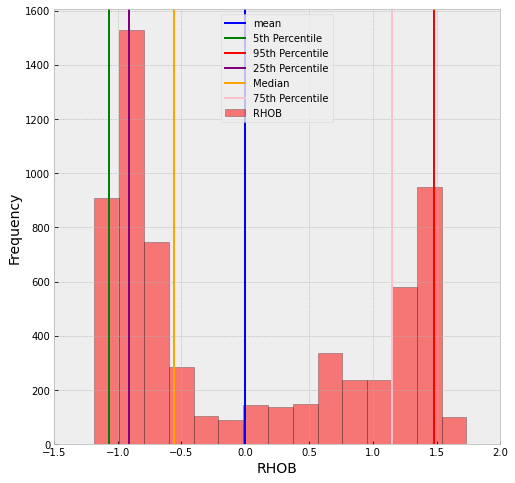

In [ ]:
# To get an idea of where these points fall in relation to our data, we can add them onto the plot 
# using axvline and passing in the calculated variables, a colour and a label

well['RHOB'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('RHOB', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(-1.5,2)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='red', label='95th Percentile')
plt.axvline(p25, color='purple', label='25th Percentile')
plt.axvline(Median, color='orange', label='Median')
plt.axvline(p75, color='pink', label='75th Percentile')

plt.legend()
plt.show()

In [ ]:
well.insert(loc=0, column='DEPTH', value=Depth)
well

,DEPTH,GR,RHOB
0,295.0,-7.723653e-01,-4.221126e-01
1,295.5,-8.307032e-01,-4.250324e-01
2,296.0,-8.299870e-01,-4.308719e-01
3,296.5,-8.107503e-01,-4.418212e-01
4,297.0,-8.097238e-01,-4.560553e-01
...,...,...,...
6528,3559.0,6.532101e-15,-6.078064e-15
6529,3559.5,6.532101e-15,-6.078064e-15
6530,3560.0,6.532101e-15,-6.078064e-15
6531,3560.5,6.532101e-15,-6.078064e-15


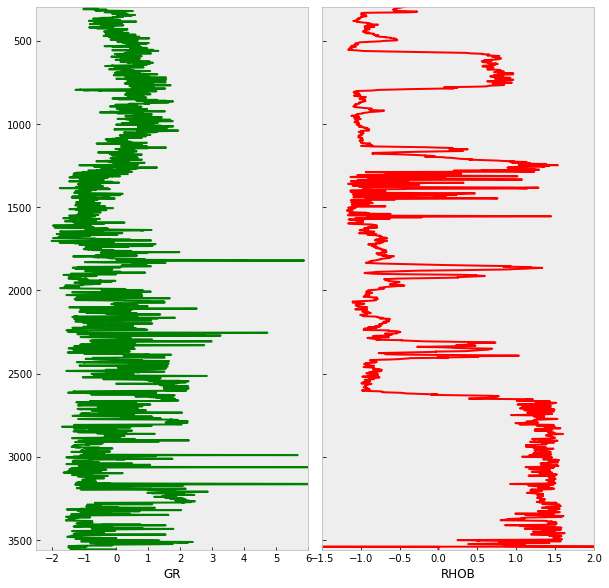

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))

curve_names = ['GR', 'RHOB']

#Set up the plot axes
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1)

#Set up the individual log tracks / subplots
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlim(-2.5, 6) 

ax2.plot("RHOB", "DEPTH", data = well, color = "red")
ax2.set_xlim(-1.5, 2)

#Set up the common elements between the subplots
for i, ax in enumerate(fig.axes):
    ax.set_ylim(3561, 295) # Set the depth range
    ax.grid()
    ax.set_xlabel(curve_names[i])

#Hide tick labels on the y-axis 
for ax in [ax2]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)